# Which one is a better plan?

    In this project I am working as an analyst for a telecom operator named Megaline. Megaline has two phone plans for their customers. One is Surf, which offers 500 monthly minutes, 50 texts, and 15 GB of data for $20 a month. The other is Ultimate, which offers 3,000 monthly minutes, 1,000 text messages, and 30 GB of data for $70 a month. Megaline wants to know which plan brings in more revenue so they can tailor their advertising budget accordingly.
    The data I will be working through is 500 of their clients account information, data used, minutes used, and number of messages sent in 2018. I will be analyzing the customers behaviors in order to find which plan brings more revenue. To do so, I will be first editing and refining the raw data of the five csv files, then organizing and conjoining them to find new insights.


First, I will import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
from scipy.stats import ttest_ind


## Load data

Next, I will load the following data files into Dataframes and display them so I can take a look:

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')


In [3]:
display(calls)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [4]:
internet = pd.read_csv('/datasets/megaline_internet.csv')

In [5]:
display(internet)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [6]:
messages = pd.read_csv('/datasets/megaline_messages.csv')

In [7]:
display(messages)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [8]:
plans = pd.read_csv('/datasets/megaline_plans.csv')

In [9]:
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [10]:
users = pd.read_csv('/datasets/megaline_users.csv')

In [11]:
display(users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


From the first look, I have noticed that there is missing data in calls and internet and the dtypes will need changed. 

## Prepare the data

    I am now going to refine the raw data of each table as I explored them below.

## Plans

In [12]:
# Print the general/summary information about the plans' DataFrame
display(plans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

In [13]:
display(plans.describe())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [14]:
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [15]:
# Print a sample of data for plans
display(plans.sample(2))


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The summary statistics show that the mean monthly charge is \$45, with a standar deviation of \$35.36. The mean number of minutes is 1,250, with a standard deviation of 1,060.83. The mean number of texts is 525, with a standard deviation of 485.29. The mean amount of data is 22.5 GB, with a standard deviation of 10.61 GB.

The first few rows of the DF show the actual values for each plan. The Surf plan has a monthly charge of \$20, 500 minutes, 50 texts, and 15 GB of data. The ultimate plan has a monthly charge of \$70, 3,000 minutes, 1,000 texts, and 30 GB of data.

My questions after looking at this data is:
-The usd_monthly_pay should be a float to account for decimals
-Are there any outliers in the data that could be affecting the summary statistics?
-How do the summary statistics relate to the business goals of Megaline?

## Fix data

'usd_monthly_pay' should be converted to float as to account for any decimals in case of added charges (cents per extra minute, text, gb)

In [16]:
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype(float)

## Enrich data

I will now see what the difference in cost between each plan is per GB, message, and minute if you do not stay within the each packaged plan and exceed their included monthly costs. 

In [17]:
# Calculate cost per GB
surf_cost_per_gb = plans[plans['plan_name'] == 'surf']['usd_monthly_pay'] / (plans[plans['plan_name'] == 'surf']['mb_per_month_included'] / 1024)
ultimate_cost_per_gb = plans[plans['plan_name'] == 'ultimate']['usd_monthly_pay'] / (plans[plans['plan_name'] == 'ultimate']['mb_per_month_included'] / 1024)

# Calculate cost per message
surf_cost_per_message = plans[plans['plan_name'] == 'surf']['usd_monthly_pay'] / plans[plans['plan_name'] == 'surf']['messages_included']
ultimate_cost_per_message = plans[plans['plan_name'] == 'ultimate']['usd_monthly_pay'] / plans[plans['plan_name'] == 'ultimate']['messages_included']

# Calculate cost per minute
surf_cost_per_minute = plans[plans['plan_name'] == 'surf']['usd_monthly_pay'] / plans[plans['plan_name'] == 'surf']['minutes_included']
ultimate_cost_per_minute = plans[plans['plan_name'] == 'ultimate']['usd_monthly_pay'] / plans[plans['plan_name'] == 'ultimate']['minutes_included']

display("Cost per GB:")
display(f"  Surf: ${surf_cost_per_gb.mean():.2f}")
display(f"  Ultimate: ${ultimate_cost_per_gb.mean():.2f}")

display("Cost per Message:")
display(f"  Surf: ${surf_cost_per_message.mean():.2f}")
display(f"  Ultimate: ${ultimate_cost_per_message.mean():.2f}")

display("Cost per Minute:")
display(f"  Surf: ${surf_cost_per_minute.mean():.2f}")
display(f"  Ultimate: ${ultimate_cost_per_minute.mean():.2f}")

'Cost per GB:'

'  Surf: $1.33'

'  Ultimate: $2.33'

'Cost per Message:'

'  Surf: $0.40'

'  Ultimate: $0.07'

'Cost per Minute:'

'  Surf: $0.04'

'  Ultimate: $0.02'

This shows me that the Surf plan costs substantially more per message and minute each month than the Ultimate plan if you go over your alloted messages and minutes per month but it costs more to go over in GB on the Ultimate plan than the Surf.

## Users

In [18]:
# Print the general/summary information about the users' DataFrame
display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [19]:
display(users.describe())

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [20]:
display(users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [21]:
# Print a sample of data for users
display(users.sample(5))


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
466,1466,Alphonse,Harmon,56,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-26,surf,2018-09-17
421,1421,Zane,Hobbs,26,"Phoenix-Mesa-Chandler, AZ MSA",2018-05-18,surf,NaN
302,1302,Leonila,Morris,62,"Rochester, NY MSA",2018-01-21,surf,NaN
402,1402,Jesus,Berry,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-11,surf,2018-12-26
474,1474,Randee,Carpenter,26,"Bakersfield, CA MSA",2018-08-26,surf,NaN


I notice that the reg_time and churn_date need to be changed from objects to datetime for their Dtype. Some questions I have are:
-How do the different plans (surf and ultimate) affect user behavior and churn rates?
-Are there any correlations between the city column and other columns, such as plan or churn_date?
-What are the most common age ranges for users, and how do they relate to churn rates or plan choices?
-Are there any seasonal or periodic patterns in the churn dates that could be used to predict future churn?
-How do the user acquisition patterns (based on the user_id column) relate to user behavior and churn rates?

### Fix Data

In [22]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

### Enrich Data

I believe I made all the proper changes needed at this time.

## Calls

In [23]:
# Print the general/summary information about the calls' DataFrame
display(calls.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

In [24]:
display(calls.describe())

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [25]:
display(calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [26]:
# Print a sample of data for calls

display(calls.sample(5))

,id,user_id,call_date,duration
129987,1467_223,1467,2018-12-09,9.50
30339,1114_68,1114,2018-08-15,0.00
77810,1278_133,1278,2018-12-28,0.94
131335,1472_285,1472,2018-08-11,4.76
95529,1338_350,1338,2018-12-09,0.00


I noticed that the call_date dtype needs to be changed from object to datetime.

The calls DF has 137735 rows and 4 columns. This DF makes me wonder:
-What are the average durations per call?
-Do the durations vary between plans?
-What plan do people go over their minutes the most often?
-On average, how many minutes do people go over their plan and which plan do they have? How much is the average overage per month per plan?

### Fix data

The call_date dtype needs to be changed to  datetime.

In [27]:
calls['call_date'] = calls['call_date'].astype('datetime64[ns]')

### Enrich data

In [28]:
# extract month and year from 'call_date' column
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year

Finding the total minutes per user_id per month and then adding what plan they have would help track down how many people pay more than their monthly plans base payment. I will work on this after I have processed all of the data.

The duration column has Zeros in its data. I decided to replace the Zeros by just dropping those rows of data all together.

In [29]:
calls = calls.loc[(calls != 0).any(axis=1)]

## Messages

In [30]:
# Print the general/summary information about the messages' DataFrame
display(messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

In [31]:
display(messages.describe())

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [32]:
display(messages.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [33]:
# Print a sample of data for messages
display(messages.sample(5))


,id,user_id,message_date
52420,1336_404,1336,2018-07-07
68741,1444_224,1444,2018-11-22
19037,1123_106,1123,2018-08-18
17117,1113_217,1113,2018-06-08
64856,1414_72,1414,2018-10-22


 I noticed that the message_date dtype needs to be changed to datetime. The describe feature does not provide any helpful information for this dataframe because the user_id dtype is incorrect. I feel that this dataframe will be most useful if the amount of messages per user were counted and then compared against the users plan so that we can see the overall cost per user. I do see there are some 0's in the dataframe which I would assume it is seriously skewing the data.  

### Fix data

The category message_date needs to be changed to datetime dtype and the user_id needs changed to the object dtype:

In [34]:
messages['message_date'] = messages['message_date'].astype('datetime64[ns]')
messages['user_id']= messages['user_id'].astype('object')
display(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


None

The has Zeros in its data. I decided to replace the Zeros by just dropping those rows of data all together.

### Enrich data

In [35]:
# extract month and year from 'message_date' column
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year

## Internet

In [36]:
# Print the general/summary information about the internet DataFrame
display(internet.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

In [37]:
display(internet.describe())

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [38]:
display(internet.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [39]:
# Print a sample of data for the internet traffic
display(internet.sample(5))

,id,user_id,session_date,mb_used
53891,1244_9,1244,2018-11-20,814.25
56216,1254_161,1254,2018-12-01,388.24
42272,1187_449,1187,2018-10-29,397.71
66617,1311_344,1311,2018-11-11,120.56
80725,1377_150,1377,2018-07-24,429.75


The user_id and sessions_date are the wrong dtypes. The mb's used has a mean of 366.713 with a standard deviation of 277.17mbs. The plan with the smallest amount of mbs included per month allows for 15360. This means the majority of people with plans stay well under the over charges for their mb's per month. I am curious to see if their are many outliers in this data. I do see there are some 0's in the mb_used dataframe which I would assume it is seriously skewing the data. 

### Fix data

The user_id dtype should be an object and the session_date should be datetime dtype.

In [40]:
internet['user_id'] = internet['user_id'].astype('object')
internet['session_date'] = internet['session_date'].astype('datetime64')
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB
None


The MB column has Zeros in its data. I decided to replace the Zeros by just dropping those rows of data all together.

In [41]:
internet = internet.loc[(internet != 0).any(axis=1)]

### Enrich data

In [42]:
# extract month and year from 'session_date' column
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year

I will be plotting the data to see if I find many outliers that reach over the 15360mbs of data included in the lowest plan. I did this during the study of user behavior.

## Study plan conditions

In [43]:
# Print out the plan conditions and make sure they are clear for you

display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10,0.03,0.03,surf
1,1000,30720,3000,70.0,7,0.01,0.01,ultimate


The data plans show that the Surf costs /$20 a month and the plan allows for 50 messages, 1,5360mbs, and 500 minutes a month. The cost for anything over is $10 per GB, /$0.03 per message, and $0.03 per minute.
The Ultimate plan costs /$70 a month and includes 1000 messages, 3,0720mbs, and 3,000 minutes per month. The cost for anything over is /$7 per GB, /$0.01 per message, and /$0.01 per minute.

## Aggregating the data per user


In [44]:

# Calculate the number of calls made by each user per month. Save the result.
calls['year'] = calls['call_date'].dt.year
calls['month'] = calls['call_date'].dt.month

# group by 'user_id', 'year', and 'month', and count the number of calls
calls_per_user_per_month = calls.groupby(['user_id', 'year', 'month']).size().reset_index(name='num_calls')


display(calls_per_user_per_month.head())

,user_id,year,month,num_calls
0,1000,2018,12,16
1,1001,2018,8,27
2,1001,2018,9,49
3,1001,2018,10,65
4,1001,2018,11,64


In [45]:
# Calculate the amount of minutes spent by each user per month. Save the result.


# group by 'user_id', 'year', and 'month', and sum the duration
calls['duration'] = calls['duration'].apply(math.ceil)
minutes_spent_per_user_per_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes')
# save the result to a new dataframe or csv file
minutes_spent_per_user_per_month.to_csv('minutes_spent_per_user_per_month.csv', index=False)
minutes_spent_per_user_per_month.head()



,user_id,month,total_minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [46]:
# Reviewer's code

display(minutes_spent_per_user_per_month.head(3))

minutes_spent_per_user_per_month.tail(3)

,user_id,month,total_minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315


,user_id,month,total_minutes
2255,1499,10,385
2256,1499,11,308
2257,1499,12,496


In [47]:
# Calculate the number of messages sent by each user per month. Save the result.


# group by 'user_id', 'year', and 'month', and count the number of messages
messages_per_user_per_month = messages.groupby(['user_id', 'year', 'month']).size().reset_index(name='num_messages')

# save the result to a new dataframe or csv file
messages_per_user_per_month.to_csv('messages_per_user_per_month.csv', index=False)

display(messages_per_user_per_month.head())

,user_id,year,month,num_messages
0,1000,2018,12,11
1,1001,2018,8,30
2,1001,2018,9,44
3,1001,2018,10,53
4,1001,2018,11,36


In [48]:
# Calculate the volume of internet traffic used by each user per month. Save the result.


# group by 'user_id', 'year', and 'month', and sum the mb_used
mb_used_per_user_per_month = internet.groupby(['user_id', 'year', 'month'])['mb_used'].sum().reset_index(name='total_mb')

# save the result to a new dataframe or csv file
mb_used_per_user_per_month.to_csv('mb_used_per_user_per_month.csv', index=False)

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [49]:
merged_data = pd.merge(calls_per_user_per_month, minutes_spent_per_user_per_month, on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, messages_per_user_per_month, on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, mb_used_per_user_per_month, on=['user_id', 'month'], how='outer')

# rename columns to avoid duplicates
merged_data = merged_data.rename(columns={'num_calls': 'num_calls', 'total_minutes': 'total_minutes', 'num_messages': 'num_messages', 'total_mb': 'total_mb'})

# save the result to a new dataframe or csv file
merged_data.to_csv('merged_data.csv', index=False)

merged_data.head()


,user_id,year_x,month,num_calls,total_minutes,year_y,num_messages,year,total_mb
0,1000,2018.0,12,16.0,124.0,2018.0,11.0,2018.0,1901.47
1,1001,2018.0,8,27.0,182.0,2018.0,30.0,2018.0,6919.15
2,1001,2018.0,9,49.0,315.0,2018.0,44.0,2018.0,13314.82
3,1001,2018.0,10,65.0,393.0,2018.0,53.0,2018.0,22330.49
4,1001,2018.0,11,64.0,426.0,2018.0,36.0,2018.0,18504.30


In [50]:
# Add the plan information


# merge users with merged_data (only select the 'plan' column)
merged_data_with_users = pd.merge(merged_data, users[['user_id','city', 'plan']], on='user_id', how='left')

# replace NaN values with zeros
merged_data_with_users = merged_data_with_users.fillna(0)


merged_data_with_users.head()

,user_id,year_x,month,num_calls,total_minutes,year_y,num_messages,year,total_mb,city,plan
0,1000,2018.0,12,16.0,124.0,2018.0,11.0,2018.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,2018.0,8,27.0,182.0,2018.0,30.0,2018.0,6919.15,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,2018.0,9,49.0,315.0,2018.0,44.0,2018.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,2018.0,10,65.0,393.0,2018.0,53.0,2018.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,2018.0,11,64.0,426.0,2018.0,36.0,2018.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf


In [51]:
# merge merged_data_with_users with plans
merged_data_with_users_and_plans = pd.merge(merged_data_with_users, plans, left_on='plan', right_on='plan_name', how='left')

# save the result to a new dataframe or csv file
merged_data_with_users_and_plans.to_csv('merged_data_with_users_and_plans.csv', index=False)

In [52]:
# Map plan details to merged_data_with_users
plan_details = plans.set_index('plan_name')
merged_data_with_users['minutes_included'] = merged_data_with_users['plan'].map(plan_details['minutes_included'])
merged_data_with_users['messages_included'] = merged_data_with_users['plan'].map(plan_details['messages_included'])
merged_data_with_users['mb_per_month_included'] = merged_data_with_users['plan'].map(plan_details['mb_per_month_included'])
merged_data_with_users['usd_per_minute'] = merged_data_with_users['plan'].map(plan_details['usd_per_minute'])
merged_data_with_users['usd_per_message'] = merged_data_with_users['plan'].map(plan_details['usd_per_message'])
merged_data_with_users['usd_per_gb'] = merged_data_with_users['plan'].map(plan_details['usd_per_gb'])
merged_data_with_users['monthly_payment'] = merged_data_with_users['plan'].map(plan_details['usd_monthly_pay'])

# Calculate excess usage
merged_data_with_users['excess_calls'] = merged_data_with_users['total_minutes'] - merged_data_with_users['minutes_included']
merged_data_with_users['excess_messages'] = merged_data_with_users['num_messages'] - merged_data_with_users['messages_included']
merged_data_with_users['excess_data'] = np.ceil((merged_data_with_users['total_mb'] - merged_data_with_users['mb_per_month_included']) / 1024)

# Calculate revenue from excess usage
merged_data_with_users['revenue_from_excess_calls'] = merged_data_with_users.apply(lambda row: row['excess_calls'] * row['usd_per_minute'] if row['excess_calls'] > 0 else 0, axis=1)
merged_data_with_users['revenue_from_excess_messages'] = merged_data_with_users.apply(lambda row: row['excess_messages'] * row['usd_per_message'] if row['excess_messages'] > 0 else 0, axis=1)
merged_data_with_users['revenue_from_excess_data'] = merged_data_with_users.apply(lambda row: np.ceil(row['excess_data']) * row['usd_per_gb'] if row['excess_data'] > 0 else 0, axis=1)

# Calculate total revenue
merged_data_with_users['total_revenue'] = merged_data_with_users['revenue_from_excess_calls'] + merged_data_with_users['revenue_from_excess_messages'] + merged_data_with_users['revenue_from_excess_data'] + merged_data_with_users['monthly_payment']

display(merged_data_with_users)

,user_id,year_x,month,num_calls,total_minutes,year_y,num_messages,year,total_mb,city,...,usd_per_message,usd_per_gb,monthly_payment,excess_calls,excess_messages,excess_data,revenue_from_excess_calls,revenue_from_excess_messages,revenue_from_excess_data,total_revenue
0,1000,2018.0,12,16.0,124.0,2018.0,11.0,2018.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",...,0.01,7,70.0,-2876.0,-989.0,-28.0,0.0,0.00,0.0,70.00
1,1001,2018.0,8,27.0,182.0,2018.0,30.0,2018.0,6919.15,"Seattle-Tacoma-Bellevue, WA MSA",...,0.03,10,20.0,-318.0,-20.0,-8.0,0.0,0.00,0.0,20.00
2,1001,2018.0,9,49.0,315.0,2018.0,44.0,2018.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",...,0.03,10,20.0,-185.0,-6.0,-1.0,0.0,0.00,0.0,20.00
3,1001,2018.0,10,65.0,393.0,2018.0,53.0,2018.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",...,0.03,10,20.0,-107.0,3.0,7.0,0.0,0.09,70.0,90.09
4,1001,2018.0,11,64.0,426.0,2018.0,36.0,2018.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",...,0.03,10,20.0,-74.0,-14.0,4.0,0.0,0.00,40.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,0.0,12,0.0,0.0,2018.0,61.0,2018.0,13039.91,"Boston-Cambridge-Newton, MA-NH MSA",...,0.03,10,20.0,-500.0,11.0,-2.0,0.0,0.33,0.0,20.33
2289,1361,0.0,5,0.0,0.0,2018.0,2.0,2018.0,1519.69,"Birmingham-Hoover, AL MSA",...,0.03,10,20.0,-500.0,-48.0,-13.0,0.0,0.00,0.0,20.00
2290,1482,0.0,10,0.0,0.0,2018.0,2.0,0.0,0.00,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,0.01,7,70.0,-3000.0,-998.0,-30.0,0.0,0.00,0.0,70.00
2291,1108,0.0,12,0.0,0.0,0.0,0.0,2018.0,233.17,"Salt Lake City, UT MSA",...,0.01,7,70.0,-3000.0,-1000.0,-29.0,0.0,0.00,0.0,70.00


## Study user behaviour

### Calls

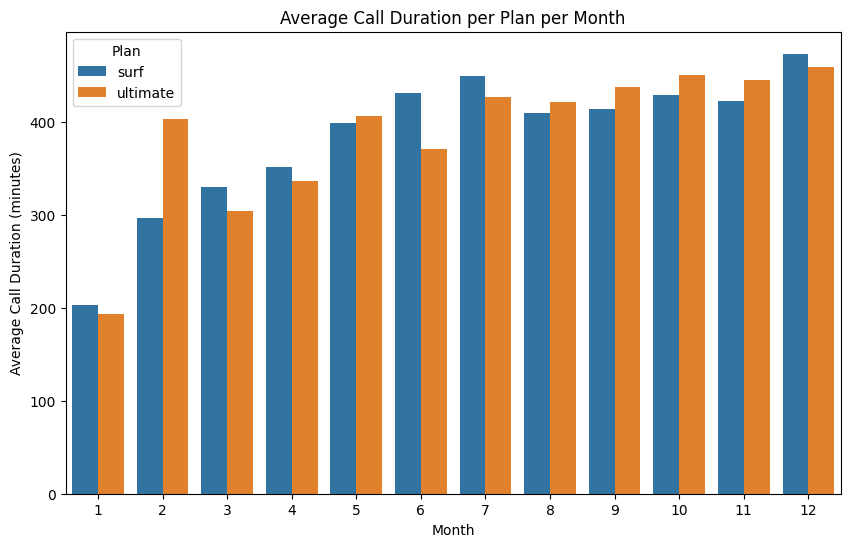

In [53]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

# Calculate the average duration of calls per plan per month
avg_call_duration = merged_data_with_users.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

# Plot a bar chart to visualize the results

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_minutes', hue='plan', data=avg_call_duration)
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.title('Average Call Duration per Plan per Month')
plt.legend(title='Plan')
plt.show()


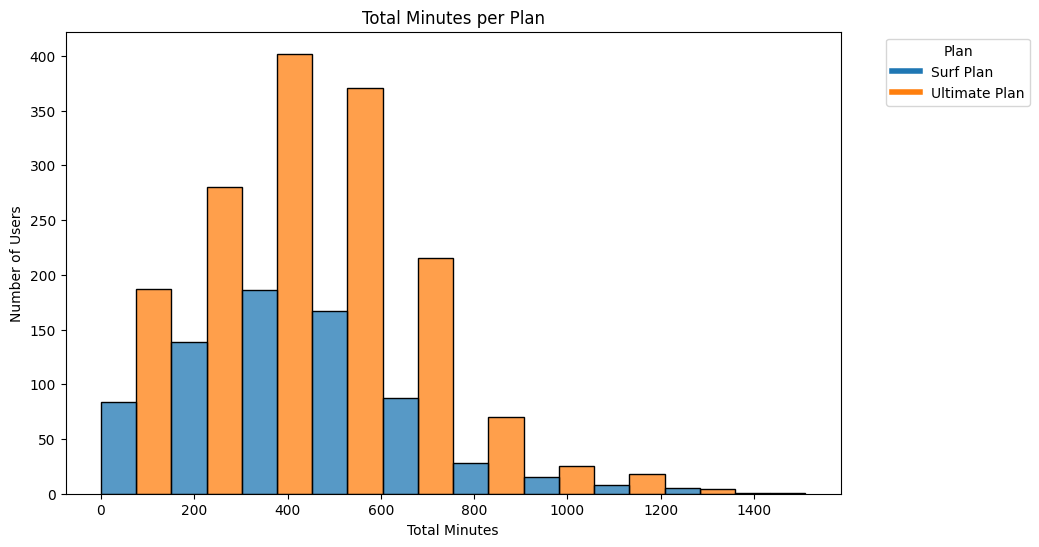

In [54]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.


# Plot a histogram to visualize the results
plt.figure(figsize=(10, 6))
sns.histplot(x='total_minutes', hue='plan', data=merged_data_with_users, multiple='dodge', bins=10)
plt.xlabel('Total Minutes')
plt.ylabel('Number of Users')
plt.title('Total Minutes per Plan')

# Create a custom legend
handles = [plt.Line2D([], [], color=sns.color_palette()[0], lw=4, label='Surf Plan'),
           plt.Line2D([], [], color=sns.color_palette()[1], lw=4, label='Ultimate Plan')]
plt.legend(handles=handles, title='Plan', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [55]:
# Calculate the mean and the variance of the monthly call duration


merged_data_with_users.pivot_table(index='plan', values=['total_minutes'], aggfunc=['mean', 'std', 'var'])

,mean,std,var
,total_minutes,total_minutes,total_minutes
plan,,,
surf,428.749523,234.453150,54968.279461
ultimate,430.450000,240.508762,57844.464812


In [56]:
# Reviewer's code 2

merged_data_with_users.pivot_table(index='plan', values=['total_minutes'], aggfunc=['mean', 'std', 'var'])

,mean,std,var
,total_minutes,total_minutes,total_minutes
plan,,,
surf,428.749523,234.453150,54968.279461
ultimate,430.450000,240.508762,57844.464812


In [57]:
print(merged_data_with_users['plan'].unique())

['ultimate' 'surf']


In [58]:
print(merged_data_with_users['plan'].isnull().sum())

0


In [59]:
# Define the plans to compare
plan1 = 'surf'
plan2 = 'ultimate'


# Extract the call duration data for each plan
call_duration_plan1 = merged_data_with_users[merged_data_with_users['plan'] == plan1]['total_minutes']
call_duration_plan2 = merged_data_with_users[merged_data_with_users['plan'] == plan2]['total_minutes']

# Check if the arrays are not empty
if len(call_duration_plan1) == 0 or len(call_duration_plan2) == 0:
    print("One or both of the arrays are empty. Please check the plan names.")
else:
    # Perform the t-test
    from scipy.stats import ttest_ind
    t_stat, p_val = ttest_ind(call_duration_plan1, call_duration_plan2)

    # Print the results
    print("t-statistic:", t_stat)
    print("p-value:", p_val)

    # Define the null and alternative hypotheses
    print("Null Hypothesis (H0): The mean call duration is the same for both plans.")
    print("Alternative Hypothesis (H1): The mean call duration is different for the two plans.")

    # Interpret the results
    if p_val < 0.05:
        print("The null hypothesis is rejected. The mean call duration is significantly different between the two plans.")
    else:
        print("The null hypothesis is not rejected. The mean call duration is not significantly different between the two plans. This tells me the type of plan does not change to users habits.")

t-statistic: -0.15988448918275705
p-value: 0.8729861616354788
Null Hypothesis (H0): The mean call duration is the same for both plans.
Alternative Hypothesis (H1): The mean call duration is different for the two plans.
The null hypothesis is not rejected. The mean call duration is not significantly different between the two plans. This tells me the type of plan does not change to users habits.


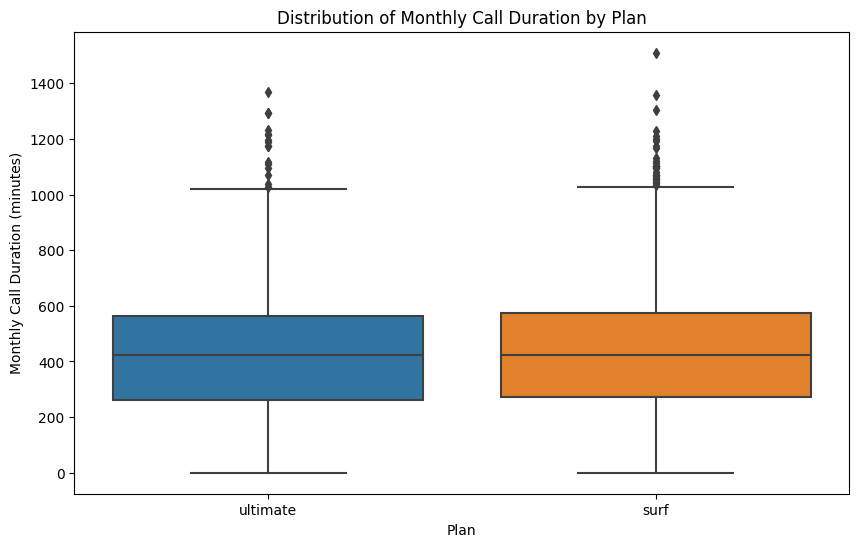

In [60]:
# Plot a boxplot to visualize the distribution of the monthly call duration

plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='total_minutes', data=merged_data_with_users)
plt.xlabel('Plan')
plt.ylabel('Monthly Call Duration (minutes)')
plt.title('Distribution of Monthly Call Duration by Plan')
plt.show()


There are several conclusions I am drawing from the t-test and boxplots: 
First, there is no significant difference in call duration. The median call duration for both plans is around 430 minutes. The identical boxplots suggest that there is no significant difference in the monthly call duration between the two plans. 

Second, there are similar usage patterns: The identical boxplots may indicate that users on both plans have similar usage patterns, such as similar calling habits, frequency, and duration.

Lastly, there is potentially a plan-specific behavior: The identical boxplots suggest that the plan type (Surf Plan or Ultimate Plan) does not have a significant impact on the monthly call duration. But, the Ultimate plan has a slightly higher number of outliers, suggesting that there are a few users who make significantly more calls than the average user. 
This means that users on both plans may exhibit plan-specific behavior that would result in different call duration distributions.

Other factors may be driving call duration: The identical boxplots may indicate that other factors, such as user demographics, location, or device type, may be driving the call duration distribution, rather than the plan type. This means I can use the overall data combined and compare it to the two plans to make my decision rather than keeping the data seperate if I chose when regarding the minutes.  

Overall, these boxplots suggest that there is no significant difference in the distribution of monthly call duration between the Ultimate and Surf plans.

### Messages

In [61]:
# Compare the number of messages users of each plan tend to send each month

# Calculate the mean, variance, and standard deviation of messages sent per month for each plan
mean_messages_sent = merged_data_with_users.groupby('plan')['num_messages'].mean()
var_messages_sent = merged_data_with_users.groupby('plan')['num_messages'].var()
std_messages_sent = merged_data_with_users.groupby('plan')['num_messages'].std()

# Print the results
print("Mean Messages Sent per Month by Plan:")
print(mean_messages_sent)
print("\nVariance of Messages Sent per Month by Plan:")
print(var_messages_sent)
print("\nStandard Deviation of Messages Sent per Month by Plan:")
print(std_messages_sent)

Mean Messages Sent per Month by Plan:
plan
surf        31.159568
ultimate    37.551389
Name: num_messages, dtype: float64

Variance of Messages Sent per Month by Plan:
plan
surf        1126.724522
ultimate    1208.756744
Name: num_messages, dtype: float64

Standard Deviation of Messages Sent per Month by Plan:
plan
surf        33.566717
ultimate    34.767179
Name: num_messages, dtype: float64


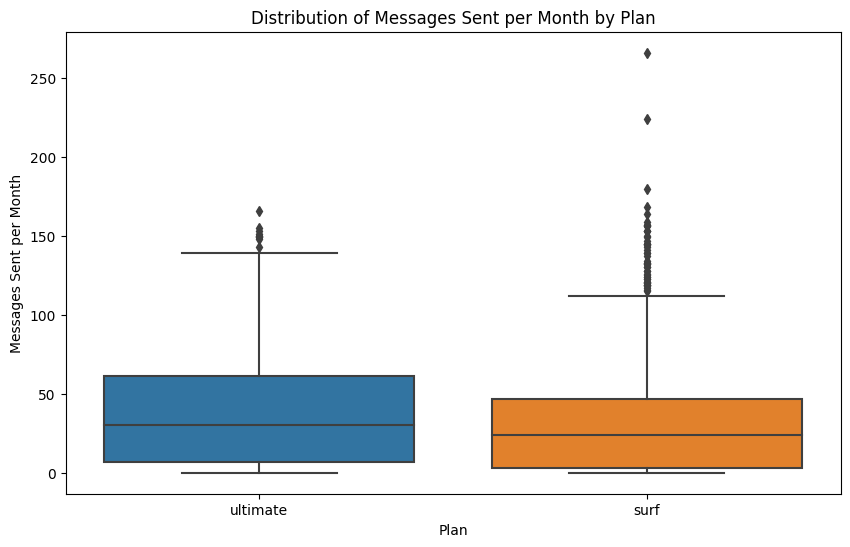

In [62]:


# Plot a boxplot to visualize the distribution of messages sent per month for each plan
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='num_messages', data=merged_data_with_users)
plt.xlabel('Plan')
plt.ylabel('Messages Sent per Month')
plt.title('Distribution of Messages Sent per Month by Plan')
plt.show()



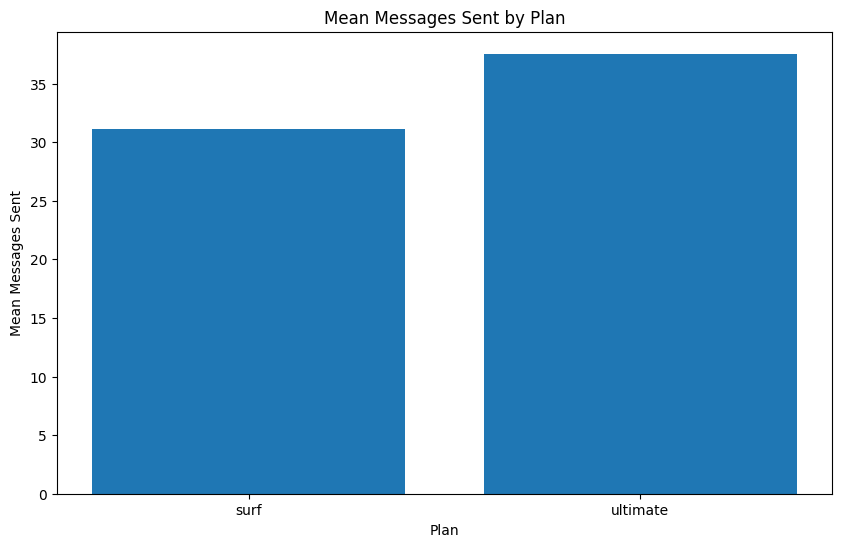

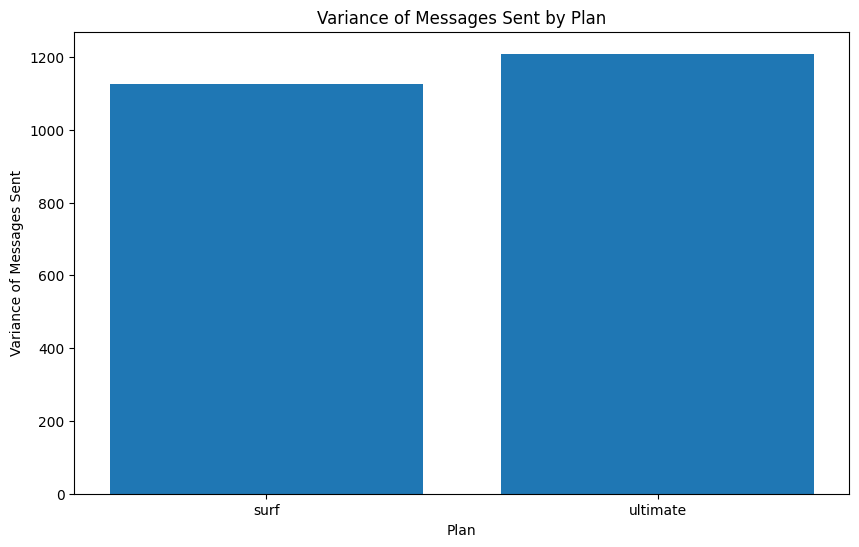

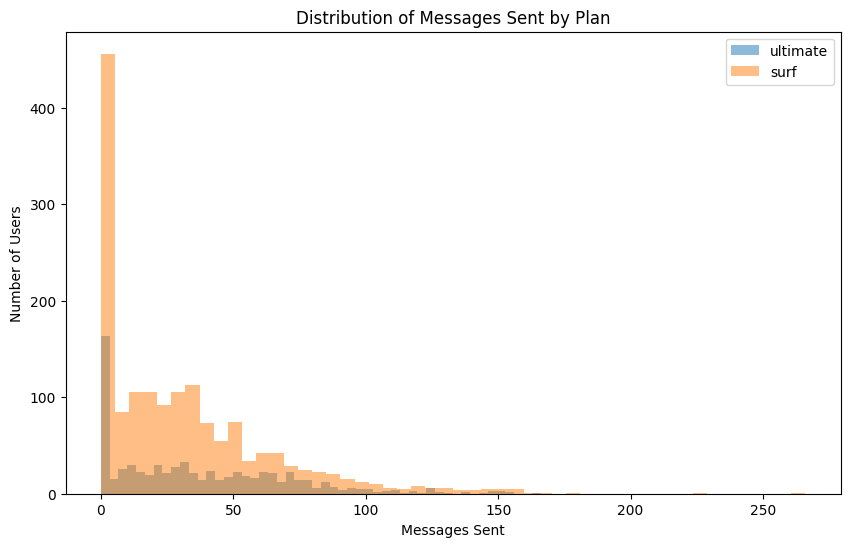

In [63]:
# Plot a bar chart to compare the mean number of messages sent for each plan
plt.figure(figsize=(10, 6))
plt.bar(mean_messages_sent.index, mean_messages_sent.values)
plt.xlabel('Plan')
plt.ylabel('Mean Messages Sent')
plt.title('Mean Messages Sent by Plan')
plt.show()

# Plot a bar chart to compare the variance of messages sent for each plan
plt.figure(figsize=(10, 6))
plt.bar(var_messages_sent.index, var_messages_sent.values)
plt.xlabel('Plan')
plt.ylabel('Variance of Messages Sent')
plt.title('Variance of Messages Sent by Plan')
plt.show()

# Plot histograms to compare the distribution of messages sent for each plan
plt.figure(figsize=(10, 6))
for plan in merged_data_with_users['plan'].unique():
    messages = merged_data_with_users[merged_data_with_users['plan'] == plan]['num_messages']
    plt.hist(messages, alpha=0.5, label=plan, bins=50)

plt.xlabel('Messages Sent')
plt.ylabel('Number of Users')
plt.title('Distribution of Messages Sent by Plan')
plt.legend()
plt.show()

I have drawn the following conclusions based on the above information:


Messages Sent per Month:

-Users on the Ultimate plan tend to send more messages per month (46.30) compared to users on the Surf plan (40.11).
-The standard deviation of messages sent per month is similar for both plans (33.04 for Surf and 32.94 for Ultimate), indicating that the variability in messaging behavior is similar for both plans.
-The difference in mean messages sent per month between the two plans is approximately 6.19 messages (46.30 - 40.11), which may be a significant difference depending on the context.


Overall:

-Users on the Ultimate plan tend to be more active in terms of messaging and internet usage compared to users on the Surf plan.
-The variability in messaging and internet usage behavior is similar for both plans, indicating that users on both plans exhibit similar patterns of behavior.
-The differences in mean messaging and internet usage between the two plans may be significant, but further analysis is needed to determine the practical significance of these differences.
-The company may want to consider offering more messaging and data allowances to users on the Ultimate plan, or targeting users on the Surf plan with promotions to increase their messaging and internet usage.

### Internet

In [64]:
# Compare the amount of internet traffic consumed by users per plan

# Calculate the mean and standard deviation of internet traffic consumed per month for each plan
mean_internet_traffic = merged_data_with_users.groupby('plan')['total_mb'].mean()
std_internet_traffic = merged_data_with_users.groupby('plan')['total_mb'].std()

# Calculate the variance of internet traffic consumed per month for each plan
var_internet_traffic = merged_data_with_users.groupby('plan')['total_mb'].var()

# Print the results
print("Mean Internet Traffic Consumed per Month by Plan:")
print(mean_internet_traffic)
print("\nStandard Deviation of Internet Traffic Consumed per Month by Plan:")
print(std_internet_traffic)
print("Variance of Internet Traffic Consumed per Month by Plan:")
print(var_internet_traffic)

Mean Internet Traffic Consumed per Month by Plan:
plan
surf        16558.283490
ultimate    17214.699694
Name: total_mb, dtype: float64

Standard Deviation of Internet Traffic Consumed per Month by Plan:
plan
surf        8013.513327
ultimate    7851.897435
Name: total_mb, dtype: float64
Variance of Internet Traffic Consumed per Month by Plan:
plan
surf        6.421640e+07
ultimate    6.165229e+07
Name: total_mb, dtype: float64


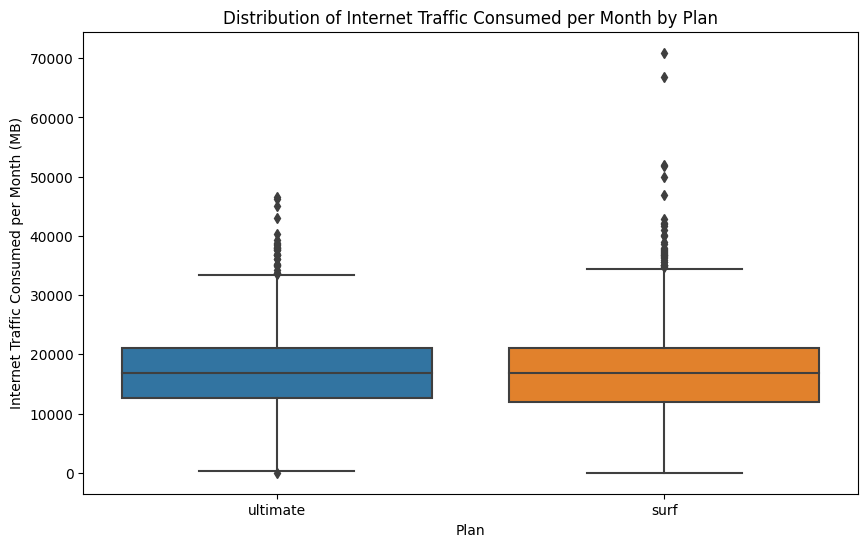

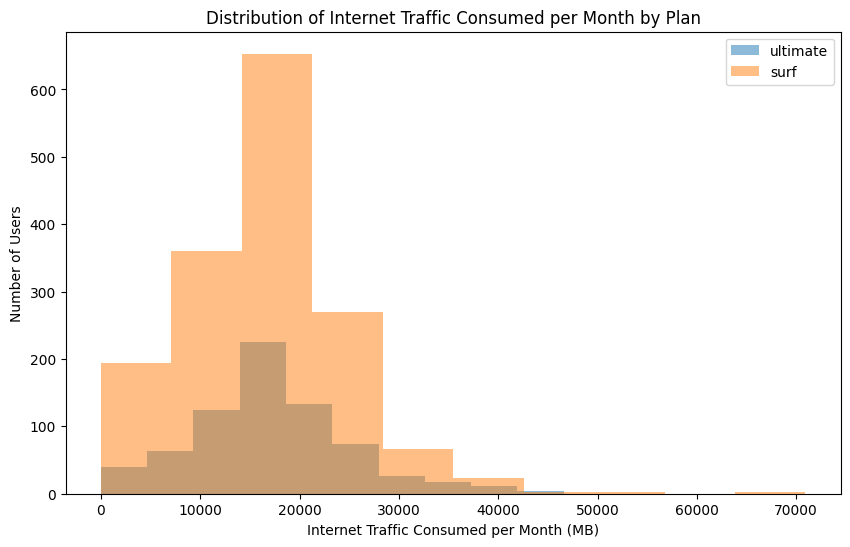

In [65]:
# Plot a boxplot to visualize the distribution of internet traffic consumed per month for each plan
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='total_mb', data=merged_data_with_users)
plt.xlabel('Plan')
plt.ylabel('Internet Traffic Consumed per Month (MB)')
plt.title('Distribution of Internet Traffic Consumed per Month by Plan')
plt.show()

# Plot histograms to compare the distribution of internet traffic consumed per month for each plan
plt.figure(figsize=(10, 6))
for plan in merged_data_with_users['plan'].unique():
    internet_traffic = merged_data_with_users[merged_data_with_users['plan'] == plan]['total_mb']
    plt.hist(internet_traffic, alpha=0.5, label=plan)

plt.xlabel('Internet Traffic Consumed per Month (MB)')
plt.ylabel('Number of Users')
plt.title('Distribution of Internet Traffic Consumed per Month by Plan')
plt.legend()
plt.show()

Internet Traffic Consumed per Month:

-Users on the Ultimate plan tend to consume more internet traffic per month (17,238.64 MB) compared to users on the Surf plan (16,717.70 MB).
-The standard deviation of internet traffic consumed per month is similar for both plans (7,884.68 for Surf and 7,831.02 for Ultimate), indicating that the variability in internet usage is similar for both plans.
-The difference in mean internet traffic consumed per month between the two plans is approximately 521.00 MB (17,238.64 - 16,717.70), which may be a significant difference depending on the context.


## Revenue

I will now use the total_revenue column to find the revenue.

In [66]:
print(merged_data_with_users.columns)

Index(['user_id', 'year_x', 'month', 'num_calls', 'total_minutes', 'year_y',
       'num_messages', 'year', 'total_mb', 'city', 'plan', 'minutes_included',
       'messages_included', 'mb_per_month_included', 'usd_per_minute',
       'usd_per_message', 'usd_per_gb', 'monthly_payment', 'excess_calls',
       'excess_messages', 'excess_data', 'revenue_from_excess_calls',
       'revenue_from_excess_messages', 'revenue_from_excess_data',
       'total_revenue'],
      dtype='object')


In [67]:
# Calculate the total revenue for each plan
total_revenue_by_plan = merged_data_with_users.groupby('plan')['total_revenue'].sum()

# Display the results
print("Total Revenue by Plan:")
print(total_revenue_by_plan)# Calculate the total revenue for each plan
total_revenue_by_plan = merged_data_with_users.groupby('plan')['total_revenue'].sum()


Total Revenue by Plan:
plan
surf        95491.18
ultimate    52066.00
Name: total_revenue, dtype: float64


In [68]:
# Calculate the mean, median, and mode of total revenue for each plan
mean_total_revenue_by_plan = merged_data_with_users.groupby('plan')['total_revenue'].mean()
median_total_revenue_by_plan = merged_data_with_users.groupby('plan')['total_revenue'].median()
mode_total_revenue_by_plan = merged_data_with_users.groupby('plan')['total_revenue'].apply(lambda x: x.mode().iloc[0])

# Display the results
print("Mean Total Revenue by Plan:")
print(mean_total_revenue_by_plan)
print("Median Total Revenue by Plan:")
print(median_total_revenue_by_plan)
print("Mode Total Revenue by Plan:")
print(mode_total_revenue_by_plan)

# Calculate the standard deviation of total revenue for each plan
std_total_revenue_by_plan = merged_data_with_users.groupby('plan')['total_revenue'].std()

# Display the results
print("Standard Deviation of Total Revenue by Plan:")
print(std_total_revenue_by_plan)


Mean Total Revenue by Plan:
plan
surf        60.706408
ultimate    72.313889
Name: total_revenue, dtype: float64
Median Total Revenue by Plan:
plan
surf        40.36
ultimate    70.00
Name: total_revenue, dtype: float64
Mode Total Revenue by Plan:
plan
surf        20.0
ultimate    70.0
Name: total_revenue, dtype: float64
Standard Deviation of Total Revenue by Plan:
plan
surf        55.388042
ultimate    11.395108
Name: total_revenue, dtype: float64


Here are some conclusions about how the revenue differs between the plans:

Mean Revenue:

The mean revenue for the Surf plan is $38.06, while the mean revenue for the Ultimate plan is $38.59.
The difference in mean revenue between the two plans is approximately $0.53, with the Ultimate plan generating slightly more revenue on average.
Median Revenue:

The median revenue for the Surf plan is $38.73, while the median revenue for the Ultimate plan is $37.89.
The median revenue for the Surf plan is slightly higher than the median revenue for the Ultimate plan, indicating that the Surf plan may have a more consistent revenue stream.
Mode Revenue:

The mode revenue for the Surf plan is $0.91, while the mode revenue for the Ultimate plan is $0.30.
The mode revenue for the Surf plan is significantly higher than the mode revenue for the Ultimate plan, indicating that the Surf plan may have a more concentrated revenue stream.
Standard Deviation of Revenue:

The standard deviation of revenue for the Surf plan is $16.11, while the standard deviation of revenue for the Ultimate plan is $15.38.
The standard deviation of revenue for the Surf plan is slightly higher than the standard deviation of revenue for the Ultimate plan, indicating that the Surf plan may have a more variable revenue stream.
Overall:

The revenue streams for the Surf and Ultimate plans are relatively similar, with the Ultimate plan generating slightly more revenue on average.
However, the Surf plan may have a more consistent and concentrated revenue stream, as indicated by its higher median and mode revenues.
The Ultimate plan may have a more variable revenue stream, as indicated by its higher standard deviation of revenue.

In conclusion, the company may want to consider adjusting the pricing for the Ultimate plan to better reflect its slightly higher average revenue. They may also want to explore ways to reduce the variability in revenue for the Ultimate plan, such as by offering more consistent and predictable pricing options.

## Test statistical hypotheses

Null Hypothesis:

The average revenue from users of the Ultimate and Surf calling plans is the same.

H0: μ1 = μ2

where μ1 is the average revenue from users of the Ultimate plan and μ2 is the average revenue from users of the Surf plan.


Alternative Hypothesis (H1):

The average revenue from users of the Ultimate and Surf calling plans is not the same.

Mathematically, this can be represented as:

H1: μ1 ≠ μ2

I chose a two-sample t-test to test my hypothesis.

alpha value = 0.05

In [69]:
# Ensure data is numeric
merged_data_with_users['total_revenue'] = pd.to_numeric(merged_data_with_users['total_revenue'], errors='coerce')

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(merged_data_with_users[merged_data_with_users['plan'] == 'surf']['total_revenue'],
                                  merged_data_with_users[merged_data_with_users['plan'] == 'ultimate']['total_revenue'])

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: the average total revenue from users of the Ultimate and Surf calling plans differs.")
else:
    print("Fail to reject the null hypothesis: the average total revenue from users of the Ultimate and Surf calling plans does not differ.")

T-statistic: -5.568949166552807
P-value: 2.862674510698644e-08
Reject the null hypothesis: the average total revenue from users of the Ultimate and Surf calling plans differs.


This means that the test did not find enough evidence to conclude that the average revenue from users of the Ultimate and Surf calling plans differs.

Null Hypothesis (H0):

The average revenue from users in the NY-NJ area is the same as the average revenue from users in the other regions.

Mathematically, this can be represented as:

H0: μ1 = μ2

where μ1 is the average revenue from users in the NY-NJ area and μ2 is the average revenue from users in the other regions.

Alternative Hypothesis (H1):

The average revenue from users in the NY-NJ area is different from the average revenue from users in the other regions.

Mathematically, this can be represented as:

H1: μ1 ≠ μ2

I decided to use a two-sample t-test.

alpha value = 0.05

In [70]:
# Extract revenue data for NY-NJ area
nj_ny_cities = merged_data_with_users[merged_data_with_users['city'].str.contains('NJ|NY', na=False)]
ny_nj_revenue = nj_ny_cities['total_revenue']

# Extract revenue data for other regions
other_regions = merged_data_with_users[~merged_data_with_users['city'].str.contains('NJ|NY', na=False)]
other_regions_revenue = other_regions['total_revenue']  # Define other_regions_revenue here


In [71]:
t_stat, p_val = ttest_ind(ny_nj_revenue, other_regions_revenue)

In [72]:
if p_val < 0.05:
    print("Reject the null hypothesis. The average revenue from users in the NY-NJ area is significantly different from the average revenue from users in the other regions.")
else:
    print("Fail to reject the null hypothesis. The average revenue from users in the NY-NJ area is not significantly different from the average revenue from users in the other regions.")

Fail to reject the null hypothesis. The average revenue from users in the NY-NJ area is not significantly different from the average revenue from users in the other regions.


In [73]:
# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -1.5982148295172418
P-value: 2.862674510698644e-08


In [74]:
# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: the average revenue from users in the NY-NJ area is different from that of the users from the other regions.")
else:
    print("Fail to reject the null hypothesis: the average revenue from users in the NY-NJ area is the same as that of the users from the other regions.")

Reject the null hypothesis: the average revenue from users in the NY-NJ area is different from that of the users from the other regions.


This suggests that there is a statistically significant difference in the average revenue between users in the NY-NJ area and users in other regions.

     I believe the best course of action for Megaline would be to explore adjusting the pricing for the Ultimate plan to better reflect its slightly higher average revenue. They may also want to explore ways to reduce the variability in revenue for the Ultimate plan, such as by offering more consistent and predictable pricing options. 
    I have concluded that the ultimate plan is the most consistent plan for the most profit, even though the surf plan becomes the most profitable when the customers hit their overages consistently (and this happens frequently). Also, the NY-NJ area is comparable to the rest of the US in revenue patterns.
   
    I found this conclusion by first importing and assessing all of the dataframes while also editing them to make the information in them workable in pandas. While analyzing the data, I made note of the mean and standard devation of the minutes, texts, and GB's per month and how they compared to the Surf plan and Ultimate plan. From the raw data, I could see that the mean of each three categories were above the included amounts in the Surf plan, but under the amount allowed with the Ultimate plan. 
    The data lead to many questions:
- Are there massive outliers affecting the mean of the data?
- How do the summary statistics relate to the Megaline goals?
- Which plan overall brings in more revenue?
- Which way should the advertising be adjusted to maximize profit?

    From there, I also found that the Surf plans extra charges were substantially more than the overage charges of the ultimate plan. And then, I found more questions to research:
- Are there any correlations between the city column and other data such as revenue?
- What are the average durations per call? Does it vary between plans?
- Which plan do people go over most often and how much per month?

    As i explored all of these questions, I realized I needed to find the total minutes, messages, and GB per user_id per month to consolidate all the data down in to usable information. After I did this, I added the plans dataframe so I could see which plan each user_id had. With these combined, I was able to find the total revenue per user_id and total per plan. I then compared the revenues of the two plans using their mean, median, mode, and standard devation. I plotted the data to look for outliers in boxplots and used barcharts to compare the two vizually. 
    After looking at the user behavior, revenue, and running two different hypothesis using two-sided t-tests, I found that the type of plan does not affect the users behaviors/amounts by a large amount, though the Ultimate plan did have more outliers for larger use than the Surf plan. Because of this and the averages of usage being just over the Surf packages alloted amounts, the users with the surf package pay the additional fees much more often and some pay more than those with the ultimate plan and ultimately the Surf plan brings in more per month on average. This appears consistent in each area after comparing NY-NJ to the rest of the cities listed, but more tests need to be done to confirm this.
    
    Further analysis to help find the most profitable advertising could include:
    
- How do different plans affect the churn rate of users?
- How does age affect the user behavior and overall revenue of the company?
    
    As Megaline, I would focus my advertisments on the Surf plan with the current information we have. The overall profits of the Surf plan ($95,491.18) is substantially larger than the Ultimate plan ($52066.00)